# Horn Antennas

Referring to Section 3.2.4, 

Horn antennas are used in many applications  as feed horns for reflector and lens antennas, as standard gain calibration antennas, and as elements in larger antenna arrays.  The popularity of horn antennas is in part due to their simple design, relatively wide bandwidth, and moderately high gain.  Since horn antennas typically have no resonant structures, they can operate over bandwidths of 10:1 and higher.  Horn antennas can have many different geometries and are flared out from the waveguide opening, as shown in Figure 3.14.  A sectoral horn has only one pair of sides flared, while the other pair of sides are parallel.   This type of geometry produces a fan-shaped antenna pattern.  The pattern is narrower in the plane of the flared sides.  This section covers three of the more basic horn antenna geometries: E-plane sectoral, H-plane sectoral, and pyramidal. 


### E-Plane Sectoral
An E-plane sectoral horn has a flared opening in the direction of the electric field, as shown in Figure 3.14. In this case, the aperture is taken to be the plane of the horn opening, and a common approximation is to assume the fields outside the aperture to be zero.  If the waveguide is operating in the dominant TE10 mode and the length of the horn is large compared to the waveguide dimensions, then the fields at the aperture of the horn are given in Equations 3.95 - 3.98.  The far zone fields are then given in Equations 3.99 - 3.101.

### H-Plane Sectoral
An H-plane sectoral horn has a flared opening in the direction of the magnetic field, as shown in Figure 3.14.  If the waveguide is operating in the dominant TE10 mode and the length of the horn is large compared to the waveguide dimensions, then the fields at the aperture of the horn are given in Equations 3.107 - 3.109.  The far zone fields are then given in Equations 3.110 - 3.112.

### Pyramidal
A pyramidal horn is flared in both the direction of the electric and magnetic fields, as shown in Figure 3.14, and is the most widely used horn antenna.  A very good approximate form for the fields in the horn aperture is given in Equations 3.121 and 3.122.  The resulting far zone fields are then Equations 3.123 - 3.125.

Begin by getting the library path

In [11]:
import lib_path

Set the operating frequency (Hz), the waveguide width (m), the waveguide height (m), the horn width (m), the horn height (m), E-plane effective length (m), and the H-plane effective length

In [12]:
frequency = 300e6

guide_width = 0.2

guide_height = 0.3

horn_width = 5.5

horn_height = 2.75

eplane_effective_length = 6.0

hplane_effective_length = 6.0

Set up the theta and phi arrays using the `meshgrid` and `linspace` routines from `scipy`

In [13]:
from scipy import linspace, meshgrid, finfo

from scipy.constants import pi


n = 400

m = int(n/4)

theta, phi = meshgrid(linspace(0.0, 0.5 * pi, n), linspace(0.0, 2.0 * pi, n))

Calculate the antenna parameters and antenna pattern for the E-plane sectoral, H-plane sectoral, or the pyramidal horn antenna

In [14]:
from Libs.antenna.horn import e_plane_sectoral, h_plane_sectoral, pyramidal


antenna_type = 'e_plane_sectoral'


if antenna_type == 'e_plane_sectoral':

    total_power_radiated = e_plane_sectoral.power_radiated(guide_width, horn_height)

    directivity = e_plane_sectoral.directivity(guide_width, horn_height, eplane_effective_length, frequency)

    _, et, ep, _, _, _ = e_plane_sectoral.far_fields(guide_width, horn_height, eplane_effective_length, frequency, 1e9, theta, phi)



elif antenna_type == 'h_plane_sectoral':
    
    total_power_radiated = h_plane_sectoral.power_radiated(guide_height, horn_width)

    directivity = h_plane_sectoral.directivity(guide_height, horn_width, hplane_effective_length, frequency)

    _, et, ep, _, _, _ = h_plane_sectoral.far_fields(guide_height, horn_width, hplane_effective_length, frequency, 1e9, theta, phi)



else:
    
    total_power_radiated = pyramidal.power_radiated(horn_width, horn_height)

    directivity = pyramidal.directivity(horn_width, horn_height, eplane_effective_length, hplane_effective_length, frequency)

    _, et, ep, _, _, _ = pyramidal.far_fields(horn_width, horn_height, eplane_effective_length, hplane_effective_length, frequency, 1e9, theta, phi)

Display the antenna parameters for the circular aperture antenna

In [15]:
print('Total radiated power (W) {:.2e}'.format(total_power_radiated))

print('Directivity {:.2f}'.format(directivity))

Total radiated power (W) 1.00e-02
Directivity 76.38


Create the U-V coordinates for displaying the antenna pattern

In [16]:
from scipy import sin, cos

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Calculate the normalized electric field magnitude

In [17]:
from scipy import sqrt, amax

e_mag = sqrt(abs(et * et + ep * ep))

e_mag /= amax(e_mag)

Create the color plot using the `matplotlib` routines

Text(0.5, 1.0, 'Horn Antenna Pattern')

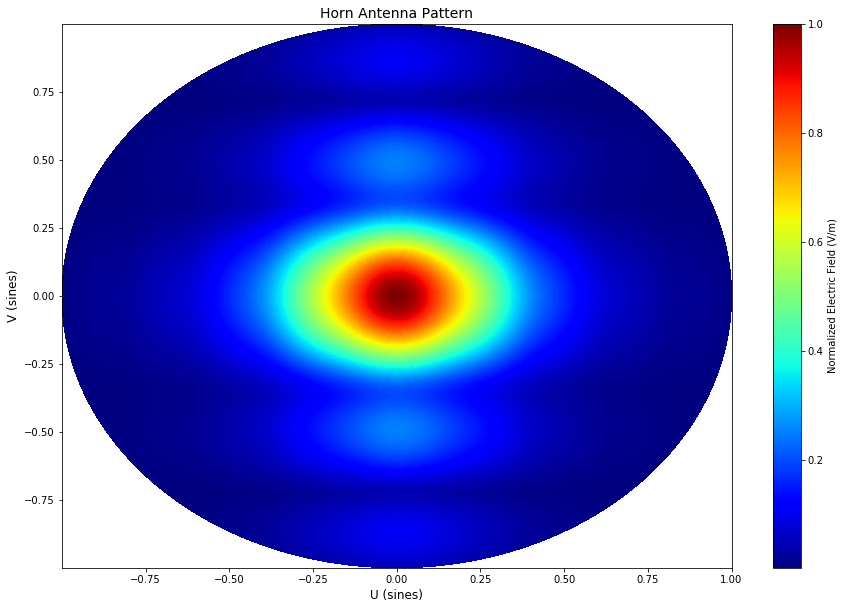

In [18]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Set up the axes

fig, axes1 = plt.subplots()

im = axes1.pcolor(uu, vv, e_mag, cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field (V/m)", size=10)



# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Horn Antenna Pattern', size=14)

Create the contour plot using the `matplotlib` routines

Text(0.5, 1.0, 'Horn Antenna Pattern')

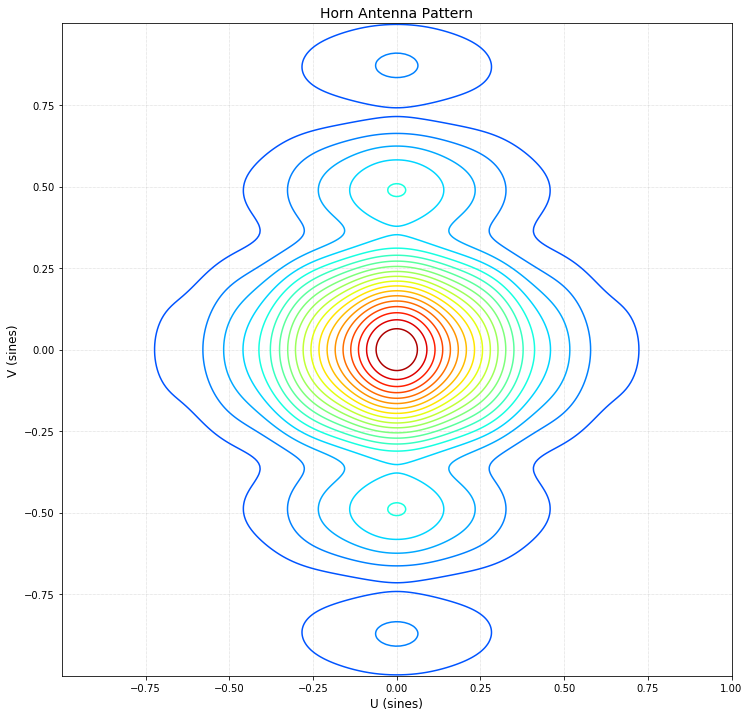

In [19]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)

plt.contour(uu, vv, e_mag, 20, cmap="jet", vmin=-0.2, vmax=1.0)

plt.grid(linestyle=':', linewidth=0.5)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Horn Antenna Pattern', size=14)

Create the line plot using the `matplotlib` routines

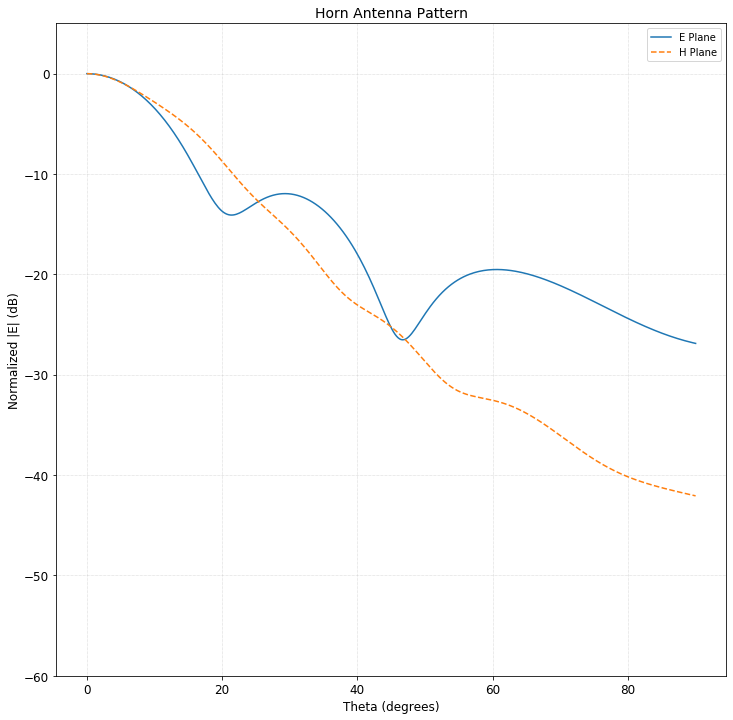

In [20]:
from scipy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[m]), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[0]), '--', label='H Plane')


# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Normalized |E| (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title

plt.title('Horn Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)